# Obrada jezika (NLTK)

**"A suite of libraries and programs for symbolic and statistical natural language processing for English"**

# Pregled
* Uvod u koncepte obrade jezika kroz primere iz biblioteke NLTK
  * Instalacija NLTK
  * Tokenizacija
  * *Stemming*/*Lemmatizing*
  * Brojanje reči
  * Uklanjanje *stopwords* i interpunkcije
  * Sinonimi i antonimi (*synsets*)
  * POS tagovanje
  * *Edit distance*
  * Feature-izacija teksta

# Instalacija
Pored standardnog `pip install nltk` potrebno je i pokrenuti liniju koda `nltk.download()` koja prikazuje interfejs za download-ovanje paketa. 

Nakon toga treba odabrati opciju `d` (download) a zatim `all` kako bi se download-ovali svi paketi.


In [0]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

# Tokenizacija
Podela teksta na rečenice i podela rečenice na reči.

In [0]:
from nltk.tokenize import sent_tokenize, word_tokenize
paragraph = """Dobro dosli na vezbe iz predmeta `Masinsko ucenje`. 
Danas radimo uvod u NLP (Natural Language Processing). Koristicemo Python biblioteku NLTK."""
sentences = sent_tokenize(paragraph)
print('Recenice:', sentences)
words = word_tokenize(sentences[0])
print('Reci u prvoj recenici:', words)

Recenice: ['Dobro dosli na vezbe iz predmeta `Masinsko ucenje`.', 'Danas radimo uvod u NLP (Natural Language Processing).', 'Koristicemo Python biblioteku NLTK.']
Reci u prvoj recenici: ['Dobro', 'dosli', 'na', 'vezbe', 'iz', 'predmeta', '`Masinsko', 'ucenje`', '.']


In [0]:
# word_tokenize nekada gresi
# wordpunct_tokenize ne gresi ali svaku interpunkciju tretira kao novu rec
# regexp_tokenize postuje pravila zadata regex-om

print(word_tokenize("won't."))
from nltk.tokenize import wordpunct_tokenize, regexp_tokenize
print(wordpunct_tokenize("won't."))
print(regexp_tokenize("won't", "[\w']+"))
print(regexp_tokenize("I can't do this. I won't do that.", "[\w']+"))

['wo', "n't", '.']
['won', "'", 't', '.']
["won't"]
['I', "can't", 'do', 'this', 'I', "won't", 'do', 'that']


# Stemming

"Trying to shorten a word with simple regex rules"

In [0]:
from nltk.stem import PorterStemmer    # najmanje agresivan
from nltk.stem import LancasterStemmer # najvise agresivan
from nltk.stem import SnowballStemmer  # potencijalno radi za druge jezike

In [0]:
porter = PorterStemmer()
print(porter.stem('cooking'))
print(porter.stem('dancing'))
print(porter.stem('dancer'))
print(porter.stem('dance'))

cook
danc
dancer
danc


In [0]:
lancaster = LancasterStemmer()
print(lancaster.stem('cooking'))
print(lancaster.stem('dancing'))
print(lancaster.stem('dancer'))
print(lancaster.stem('dance'))

cook
dant
dant
dant


# Lemmatizing
"Trying to find the root word with linguistics rules (with the use of regexes)"

Koristi POS tagovanje:
* n Noun 
* a Adjective 
* r Adverb 
* v Verb



In [0]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('playing', pos="v"))
print(lemmatizer.lemmatize('playing', pos="n"))
print(lemmatizer.lemmatize('playing', pos="a"))
print(lemmatizer.lemmatize('playing', pos="r"))

print(lemmatizer.lemmatize('dancing', pos='v'))
print(porter.stem('dancing'))


play
playing
playing
playing
dance
danc


# Brojanje reči
Iako ovo možemo lako uraditi ručno, klasa `FreqDist` olakšava proces.


['hello', 'world', ',', 'hello', 'people', ',', 'this', 'is', 'hello', 'world', 'example', 'of', 'word', 'count', '.']


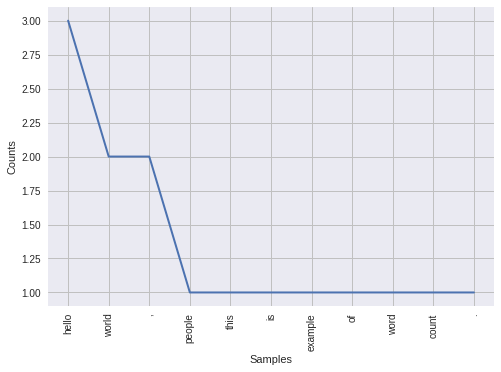

In [0]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize
sent = 'hello world, hello people, this is hello world example of word count.'
sent_tok = word_tokenize(sent)
print(sent_tok)
freq = FreqDist(sent_tok)
freq.plot(30, cumulative=False)

# Uklanjanje stopwords i interpunkcije

In [0]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."

stop_punc = set(stopwords.words('english')).union(set(punctuation))
print(stop_punc)

words = word_tokenize(data)
words_lower = [w.lower() for w in words]
words_filtered = [w for w in words_lower if w not in stop_punc]
print(words_filtered)

{'all', '_', 'against', 'in', '$', '`', 'herself', 'when', "she's", 'than', '}', 'above', 'each', 'through', 'as', 'mightn', '|', ')', 'these', "doesn't", 'other', 'couldn', 'because', 'am', '.', 'its', "don't", 'but', 'haven', 'my', 'again', 'does', 'further', "needn't", 'll', 'shan', "weren't", "didn't", ',', 'don', '<', '!', 's', 'are', "shan't", 'ain', 'any', 'him', "wouldn't", 'being', 'i', 'should', 'weren', "it's", "mightn't", 'on', 'been', 'only', 'them', 'this', 'doesn', 'our', "mustn't", 'down', 'yourselves', 'while', 'his', 'if', 'will', 'mustn', '[', 'myself', "you're", 'about', 'doing', "shouldn't", "'", 'most', 'd', 'you', 'he', '?', 'were', 'off', ':', 'can', 'they', 'which', '^', 'during', ';', 'wouldn', 'the', 'who', 'a', 'there', 'isn', 'won', 'under', 'just', 'with', 'and', 'between', '(', 'to', 'such', 'having', 'themselves', 'theirs', 'didn', 'over', '#', "haven't", 'himself', '\\', 'some', 've', "you'd", 'their', 're', 'itself', 'how', 'those', '{', 'did', 'it', '

# Sinonimi i antonimi

In [0]:
from nltk.corpus import wordnet
synsets = wordnet.synsets('win')

# synset = skup sinonima
print(synsets)
print(synsets[0].definition())

# prosirujemo synsete lemama
syn_lems = []
for syn in synsets:
  syn_lems.extend(syn.lemmas())
syn_lems = [lem.name() for lem in syn_lems]
print(set(syn_lems))

# antonimi
print(synsets[2].lemmas()[0].antonyms()[0].name())

# prosirujemo antonime lemama
ants = []
for syn in synsets:
    for lem in syn.lemmas():
        for ant in lem.antonyms():
            ants.append(ant.name())
print(ants)

[Synset('win.n.01'), Synset('winnings.n.01'), Synset('win.v.01'), Synset('acquire.v.05'), Synset('gain.v.05'), Synset('succeed.v.01')]
a victory (as in a race or other competition)
{'deliver_the_goods', 'profits', 'winnings', 'acquire', 'get_ahead', 'make_headway', 'gain_ground', 'gain', 'win', 'come_through', 'succeed', 'advance', 'pull_ahead', 'bring_home_the_bacon'}
lose
['losings', 'lose', 'lose', 'fall_back', 'fail']


In [0]:
# stablo "nasledjivanja" synseta
# najapstraktniji pojmovi: hypernyms
# najkonkretniji pojmovi: hyponyms
win = synsets[0]
print(win.hypernyms())
print(win.hypernyms()[0].hyponyms())
print(win.root_hypernyms())

[Synset('victory.n.01')]
[Synset('checkmate.n.01'), Synset('fall.n.10'), Synset('independence.n.02'), Synset('landslide.n.01'), Synset('last_laugh.n.01'), Synset('pyrrhic_victory.n.01'), Synset('runaway.n.01'), Synset('service_break.n.01'), Synset('slam.n.01'), Synset('walk-in.n.03'), Synset('win.n.01')]
[Synset('entity.n.01')]


# POS tagovanje
POS = Part-Of-Speech, labeliranje reči u tekstu u odnosu na ulogu u govoru.


[Spisak POS tagova](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

In [0]:
from nltk.tag import pos_tag
words = word_tokenize('And now for something completely different')
pos_tag(words)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

# Edit distance
Edit distance dve reči je minimalan broj operacija tako da se dobije druga reč polazeći od prve. Dozvoljene operacije su brisanje, dodavanje i izmena slova.

In [0]:
from nltk.metrics import *

print(edit_distance("rain", "shine"))

# rain
# **  *
# shine
#
# imamo dve izmene i jedno dodavanje pa je edit distance 3

3


In [0]:
# primer: spell checker
# nalazimo najblizu rec u korpusu po edit distance-u

words = nltk.corpus.words.words()

mistake = "ligting"
 
words = ['apple', 'bag', 'drawing', 'listing', 'linking', 'living', 'lighting', 'orange', 'walking', 'zoo']

words_with_ed = [(nltk.edit_distance(mistake, w), w) for w in words]
print(sorted(words_with_ed)[:3])

# ovde smo koristili spisak od 10 reci
# za veci spisak koristiti nltk.corpus.words.words()

[(1, 'lighting'), (1, 'listing'), (2, 'linking')]


# Feature-izacija teksta


* Većina ML algoritama radi sa jasno definisanim ulazima/izlazima u vidu vektora/matrica realnih brojeva
* Iz tog razloga kako bismo primenili neki ML model na tekst, potrebno je izvršiti *feature-izaciju* (feature extraction), tj. pretvoriti tekst (rečenice/reči/dokumente) u format pogodan za model
* Neki od pristupa su:
  * **Bag-of-Words model (BoW)**: 
      * Svaki tekst tretiramo kao vektor broja pojavljivanja reči u njemu, važan je samo broj pojavljivanja
  * **N-gram model**:
      * Za razliku od BoW važan je i redosled reči, jer se posmatra broj pojavljivanja N-grama (nizova uzastopnih reči dužine N) u tekstu
      * Za N=2 posmatraju se bigrami tj. parovi uzastopnih reči
      * Za N=1 posmatraju se *1-grami* tj. reči pa dobijamo ponovo BoW model
      * Umesto broja pojavljivanja možemo meriti i koristiti i neke druge metrike:
        * **Prisutnost**: 0 ili 1 u zavisnosti od toga da li je N-gram prisutan u tekstu, jednostavnije od broja pojavljivanja
        * **Frekvencija**: broj pojavljivanja N-grama podeljen sa ukupnom dužinom teksta, naprednije od broja pojavljivanja, uzima u obzir razlike u dužinama tekstova u korpusu
  * **TF-IDF**:
    * Metoda dodeljivanja *skora* paru $(reč, tekst)$ naprednija od prethodne tri
    * Formula: $TF-IDF(reč, tekst) = TF(reč, tekst) * IDF(reč)$
    * $TF$ predstavlja *term frequency* tj. već pominjanu frekvenciju reči u tekstu
      * $TF$ je **lokalni** skor (označava koliko je reč važna za dati tekst)
    * $IDF$ predstavlja *inverse document frequency* po formuli $\log{\frac{|korpus|}{|tekst \in korpus~:~reč \in tekst|}}$
      * $IDF$ je veći za reči koje se retko pojavljuju na nivou celog korpusa, a manji za reči prisutne u većini dokumenata (pretpostavka je da takve reči ne nose informaciju)
      * $IDF$ je **globalni** skor (označava koliko je često prisustvo neke reči značajno)
    * Pored feature-izacije teksta česta primena u algoritmima internet pretrage i filtriranju stopwords
* Glavna mana svih ovih modela je što potpuno zanemaruju kontekst, naročito u dužim tekstovima
* Za modelovanje konteksta se koriste *rekurentne neuralne mreže* kojima ćemo se baviti za nekoliko časova

In [0]:
from nltk import FreqDist
from nltk.tokenize import wordpunct_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import numpy as np
import math

corpus = ["Jack likes action movies. 'Action movies are great' - Jack",
          "Jack also likes to watch football games.",
          "Jessica and Jack like to watch a movie together."]

# Cistimo korpus
print('Cleaning the corpus...')
clean_corpus = []
stop_punc = set(stopwords.words('english')).union(set(punctuation))
for doc in corpus:
  words = wordpunct_tokenize(doc)
  words_lower = [w.lower() for w in words]
  print(words_lower)
  words_filtered = [w for w in words_lower if w not in stop_punc]
  print(words_filtered)
  words_stemmed = [porter.stem(w) for w in words_filtered]
  print('Final:', words_stemmed)
  clean_corpus.append(words_stemmed)
  # Primetiti razliku u vokabularu kada se koraci izostave

# Kreiramo vokabular
print('Creating the vocab...')
vocab_set = set()
for doc in clean_corpus:
  for word in doc:
    vocab_set.add(word)
vocab = list(vocab_set)

print('Vocab:', list(zip(vocab, range(len(vocab)))))
print('Feature vector size: ', len(vocab))

# 1: Bag of Words model sa 3 različita scoringa
np.set_printoptions(precision=2, linewidth=200)

def occ_score(word, doc):
   return 1 if word in doc else 0
  
def numocc_score(word, doc):
  return doc.count(word)

def freq_score(word, doc):
  return doc.count(word) / len(doc)

print('Creating BOW features...')
for score_fn in [occ_score, numocc_score, freq_score]:
  X = np.zeros((len(clean_corpus), len(vocab)), dtype=np.float32)
  for doc_idx in range(len(clean_corpus)):
    doc = clean_corpus[doc_idx]
    for word_idx in range(len(vocab)):
      word = vocab[word_idx]
      cnt = score_fn(word, doc)
      X[doc_idx][word_idx] = cnt
  print('X:')
  print(X)
  print()

# 2. Bigram model
for doc in clean_corpus:
  bigrams = []
  for i in range(len(doc)-1):
    bigram = doc[i] + ' ' + doc[i+1]
    bigrams.append(bigram)
  print('Bigrams:')
  print(bigrams)
  # Ostatak kreiranja feature vektora bi bio isti
  # Vocab bi postao skup svih bigrama
print()

# 3. TF-IDF
# Racunamo IDF mapu
print('Calculating the IDF table...')
doc_counts = dict()
for word in vocab:
  doc_counts[word] = 0
  for doc in clean_corpus:
    if word in doc:
      doc_counts[word] += 1
print('Doc counts:')
print(doc_counts)
idf_table = dict()
for word in vocab:
  idf = math.log10(len(corpus)/doc_counts[word])
  idf_table[word] = idf
print('IDF table:')
print(idf_table)

# Isti kod kao kod BOW
def tfidf_score(word, doc):
  tf = freq_score(word, doc)
  idf = idf_table[word]
  return tf * idf

print('Creating TF-IDF features...')
X = np.zeros((len(clean_corpus), len(vocab)), dtype=np.float32)
for doc_idx in range(len(clean_corpus)):
  doc = clean_corpus[doc_idx]
  for word_idx in range(len(vocab)):
    word = vocab[word_idx]
    cnt = tfidf_score(word, doc)
    X[doc_idx][word_idx] = cnt
print('X:')
print(X)
print()
print('Vocab again for reference:')
print(vocab)
print('Corpus again for reference:')
for doc in clean_corpus:
  print(doc)


Cleaning the corpus...
['jack', 'likes', 'action', 'movies', '.', "'", 'action', 'movies', 'are', 'great', "'", '-', 'jack']
['jack', 'likes', 'action', 'movies', 'action', 'movies', 'great', 'jack']
Final: ['jack', 'like', 'action', 'movi', 'action', 'movi', 'great', 'jack']
['jack', 'also', 'likes', 'to', 'watch', 'football', 'games', '.']
['jack', 'also', 'likes', 'watch', 'football', 'games']
Final: ['jack', 'also', 'like', 'watch', 'footbal', 'game']
['jessica', 'and', 'jack', 'like', 'to', 'watch', 'a', 'movie', 'together', '.']
['jessica', 'jack', 'like', 'watch', 'movie', 'together']
Final: ['jessica', 'jack', 'like', 'watch', 'movi', 'togeth']
Creating the vocab...
Vocab: [('movi', 0), ('footbal', 1), ('watch', 2), ('game', 3), ('like', 4), ('also', 5), ('jack', 6), ('action', 7), ('togeth', 8), ('great', 9), ('jessica', 10)]
Feature vector size:  11
Creating BOW features...
X:
[[1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.